# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/kabhishm/top-american-colleges-2022

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [102]:
import numpy as np
import pandas as pd
college_data = pd.read_csv("checkpoint-three.csv")

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [103]:
college_data.describe()

,Unnamed: 0,rank,studentPopulation,medianBaseSalary,yearFounded,studentFacultyRatio,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000,498.000000
mean,248.500000,249.485944,16073.983936,114746.184739,1702.520080,14.120482,12075.550201,2.476178e+07,85.682731,80.451807
std,143.904482,143.899350,16284.865007,21873.916081,552.280435,5.203074,12628.161452,1.940661e+07,15.900082,19.369714
min,0.000000,1.000000,421.000000,0.000000,0.000000,3.000000,421.000000,0.000000e+00,0.000000,0.000000
25%,124.250000,125.250000,3112.500000,103900.000000,1839.250000,10.000000,2613.750000,1.199195e+07,77.000000,67.000000
50%,248.500000,249.500000,9850.000000,112650.000000,1871.500000,13.500000,6844.500000,1.887069e+07,91.500000,87.000000
75%,372.750000,373.750000,24363.000000,124750.000000,1905.500000,17.000000,18655.250000,3.216495e+07,98.000000,97.000000
max,497.000000,498.000000,102826.000000,173700.000000,2013.000000,49.000000,84202.000000,1.575583e+08,100.000000,100.000000


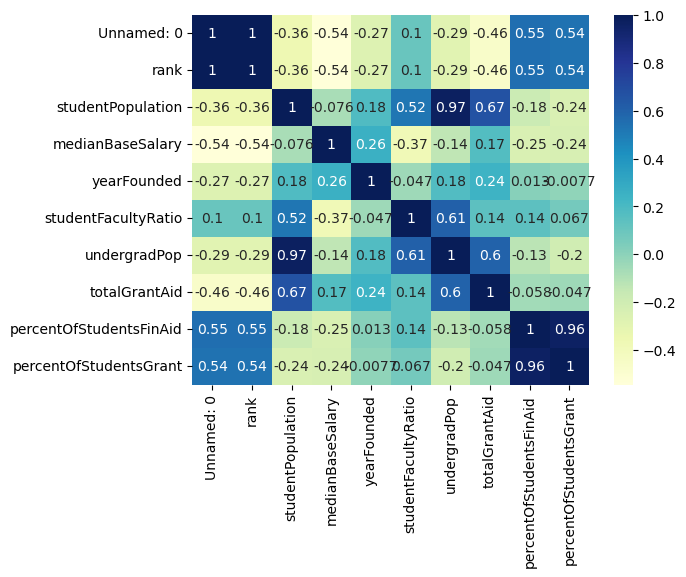

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(college_data.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

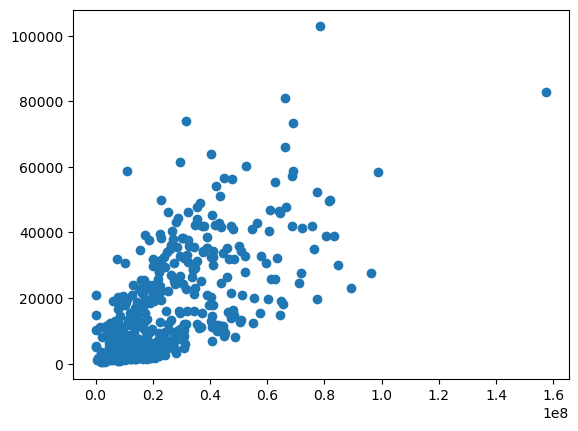

In [105]:
X = college_data['totalGrantAid']
Y = college_data['studentPopulation']
plt.scatter(X,Y)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
X_train
Y_train

84      1733
308     9268
492     8667
126      421
310    19107
       ...  
343     1459
359     3393
323     4020
280    20099
8      17855
Name: studentPopulation, Length: 348, dtype: int64

In [107]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params

const            1795.538089
totalGrantAid       0.000576
dtype: float64

In [108]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      studentPopulation   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.31e-45
Time:                        19:48:52   Log-Likelihood:                -3763.7
No. Observations:                 348   AIC:                             7531.
Df Residuals:                     346   BIC:                             7539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1795.5381   1077.368      1.667      0.096    -323.477    3914.553
totalGrantAid     0.0006   3.49e-05     16.520      0.000       0.001       0.001
==============================================================================
Omnibus:                       74.411   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.873
Skew:                           1.115   Prob(JB):                     1.05e-33
Kurtosis:                       5.346   Cond. No.                     5.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

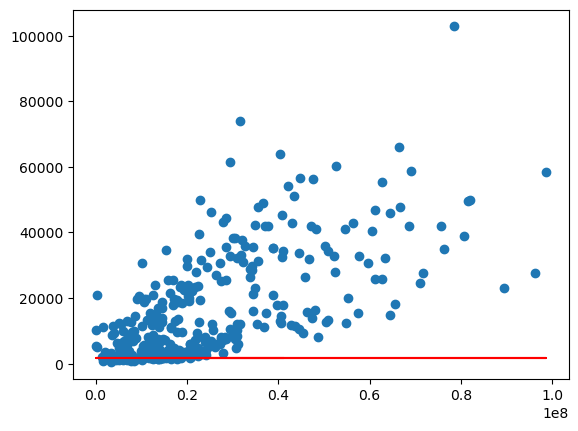

In [120]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 1795 + 0.0 * X_train, 'r')
plt.show()

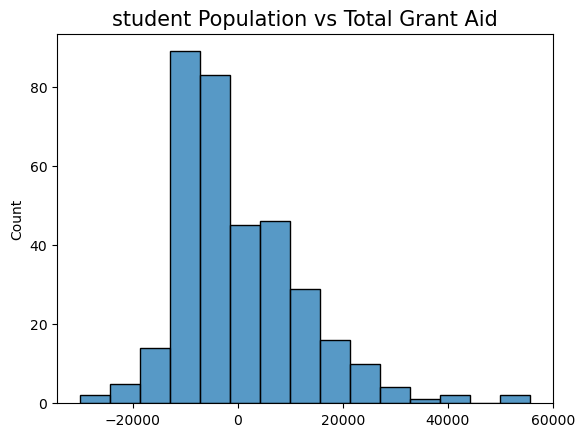

In [110]:
Y_train_pred = lr.predict(X_train_sm)

res = (Y_train - Y_train_pred)

fig = plt.figure()
sns.histplot(res, bins=15)
plt.title('student Population vs Total Grant Aid', fontsize=15)
#plt.xlabel(Y_train)
plt.show()

## Error Terms

Finally, plot your error terms!

In [111]:
X_test_sm = sm.add_constant(X_test)

Y_test_pred = lr.predict(X_test_sm)

Y_test_pred

103     8411.411882
136    23396.846869
140    15650.936723
459     3607.425923
353    18281.514210
           ...     
392     6412.543053
455     8417.262061
75     20345.338864
469     5873.643823
152     5171.647746
Length: 150, dtype: float64

In [112]:
from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, Y_test_pred)
r_squared

0.45144320644045977

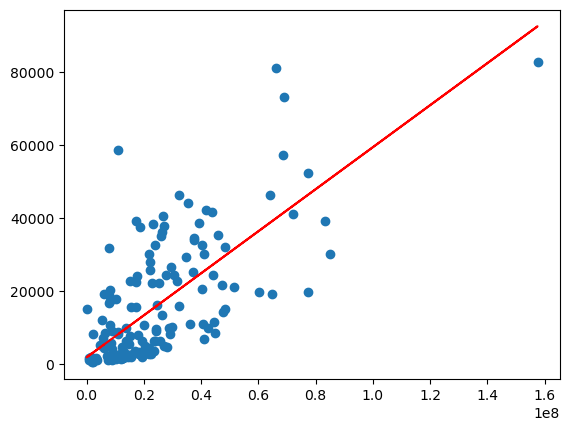

In [113]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, 'r')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, Y_train_lm, Y_test_lm = train_test_split(X, Y, train_size= 0.7, test_size = 0.3, random_state=100)
X_train_lm.shape

(348,)

In [115]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)
print (X_train_lm.shape)
print (X_test_lm.shape)

(348, 1)
(150, 1)


In [116]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_lm, Y_train_lm)

print(f"Intercept: {lm.intercept_}")
print(f"Slope: {lm.coef_}")

Intercept: 1795.538089409274
Slope: [0.0005762]


In [117]:
print(f"Intercept: {lm.intercept_}")
print(f"Slope: {lm.coef_}")

Intercept: 1795.538089409274
Slope: [0.0005762]


In [119]:
Y_train_pred = lm.predict(X_train_lm)
Y_test_pred = lm.predict(X_test_lm)

print(r2_score(Y_train, Y_train_pred))
print(r2_score(Y_test, Y_test_pred))

0.44094566153342396
0.45144320644045965


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.45144320644045977
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really